In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
import xgboost as xgb

In [4]:
df_ramen

,Review,Brand,Variety,Style,Country,Stars,Top10
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [2]:
df_ramen=pd.read_csv("C:/Users/hiten/Downloads/ramen-ratings.csv")
df_ramen.rename(columns={'Top Ten':"Top10","Review #":"Review"},inplace=True)

In [3]:
df_ramen.Style.replace(np.nan,"Pack",inplace=True)

In [4]:
brandx='New Touch'
countryx='Japan'
stylex='Cup'

In [5]:
df_ramen.Country.unique()
df_ramen.Brand.unique()
df_ramen.Style.unique()


array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

In [5]:
Brand_enc=OneHotEncoder(drop='first')
Country_enc=OneHotEncoder(drop='first')
Style_enc=OneHotEncoder(drop='first')
brand_dummy=Brand_enc.fit_transform(df_ramen[['Brand']]).toarray()
country_dummy=Country_enc.fit_transform(df_ramen[['Country']]).toarray()
style_dummy=Style_enc.fit_transform(df_ramen[['Style']]).toarray()

In [6]:
dummy_df_brand=pd.DataFrame(data=brand_dummy,columns=[
    'Just Way', 'Nissin', 'Wei Lih', "Ching's Secret",
       'Samyang Foods', 'Acecook', 'Ikeda Shoku', "Ripe'n'Dry", 'KOKA',
       'Tao Kae Noi', 'Yamachan', 'Nongshim', 'TRDP', 'Binh Tay', 'Paldo',
       'Jackpot Teriyaki', 'Yum-Mie', 'MyKuali', 'Ottogi',
       'Sichuan Guangyou', 'Lipton', 'Lele', 'Fujiwara', 'Uni-President',
       'Maruchan', 'Prima', 'Sokensha', 'Takamori', 'Guava Story',
       'Samurai Ramen', 'Ogasawara', 'Pringles', "Mom's Dry Noodle",
       'Maggi', 'Indomie', 'Happy Cook', 'The Ramen Rater Select', 'TTL',
       'E-Zee', 'Kiki Noodle', 'Tokyo Noodle', 'GGE', 'Myojo', 'Sau Tao',
       'Wang', 'Daifuku', 'Master Kong', "World O' Noodle", 'Kang Shi Fu',
       'Mum Ngon', 'Fashion Food', 'Dream Kitchen', 'Ajinatori',
       "Dr. McDougall's", 'Ve Wong', 'Super Bihun', 'Xiuhe',
       'Little Cook', 'Shirakiku', "Mama Pat's", 'Goku-Uma',
       'Sichuan Baijia', 'Liang Cheng Mai', 'Gefen', 'Hua Feng',
       'Pulmuone', 'Liu Quan', 'Daikoku', 'Chuan Wei Wang', 'Wai Wai',
       'Kamfen', 'Marutai', 'Vifon', '1 To 3 Noodles', 'Fantastic',
       'Knorr', 'Sempio', 'Patanjali', 'Qin Zong', 'Pran',
       'Sapporo Ichiban', 'MAMA', 'Xiao Ban Mian', 'Suimin', 'Cintan',
       'JML', 'Unif Tung-I', 'Tablemark', "Farmer's Heart", 'Fuku',
       'Singa-Me', 'Love Cook', 'Great Value', 'Asian Thai Foods',
       'Nagatanien', 'Nyor Nyar', 'Tseng Noodles', 'A-Sha Dry Noodle',
       'Morre', 'Roland', "Mr. Lee's Noodles", 'Choumama',
       'President Rice', 'Happy Family', 'Menraku', 'La Moderna',
       'Jingqi', 'Thien Houng Foods', 'Doll', 'Four Seas', 'CarJEN',
       '7 Select', 'Oni Hot Pot', 'Weh Lih', 'Itomen', 'Sanpo',
       'Mi Sedaap', 'Tokushima Seifun', 'Mamee', 'Zow Zow', 'Koyo',
       'ORee Garden', 'A1', 'Migawon', "Chaudhary's Wai Wai",
       'Urban Noodle', 'Trident', 'Conimex', 'Prima Taste', 'MyOri',
       'Itsuki', 'Kabuto Noodles', 'IbuRamen', 'Koh Thai', 'Bamee',
       'Ibumie', 'Unox', 'Fortune', 'Bonasia', 'Mie Sedaap', 'iMee',
       'Thai Smile', 'Asia Gold', 'Pirkka', 'Higashimaru', 'Kuriki',
       'Vedan', 'Yum Yum', 'Mama', 'Baijia', 'Daraz', 'Pama', 'Seven & I',
       'Forest Noodles', "Vit's", 'Ten-In', 'Sugakiya Foods', 'Hao Way',
       'Nakaya Shouten', 'Thai Chef', 'Crystal Noodle', 'Azami', 'Super',
       'Torishi', 'Western Family', 'Chering Chang', 'Ishimaru',
       'Authentically Asian', 'Aroi', 'Koka', 'Wu-Mu', 'Yamadai',
       'Vina Acecook', 'Baixiang Noodles', 'Salam Mie', 'Lee Fah Mee',
       'Sakurai Foods', 'The Kitchen Food', 'Premiere', '7 Select/Nissin',
       'Wugudaochang', 'Emart', 'Lishan Food Manufacturing', 'Ah Lai',
       'Tropicana Slim', 'A-One', 'Deshome', 'Paldo Vina', 'Chencun',
       'United', 'ChoripDong', 'Shan', 'Ruski', 'No Name', 'New Way',
       'Lucky Me!', "Campbell's", 'One Dish Asia', 'Long Jun Hang',
       'Unif-100', 'Hankow', 'The Bridge', 'Mitoku', 'Unzen', 'Uncle Sun',
       'Mi E-Zee', 'E-mi', 'J.J.', 'Curry Prince', 'Econsave', 'Oyatsu',
       'Kin-Dee', 'Ko-Lee', 'ICA', 'Nanyang Chef', 'Thai Pavilion',
       'Miliket', 'Katoz', 'Men-Sunaoshi', 'Chewy', 'Adabi',
       'Osaka Ramen', "Sainsbury's", 'Pamana', "Annie Chun's", 'La Fonte',
       'Thai Choice', 'Tesco', 'Pop Bihun', 'Snapdragon', 'Saji',
       'Miracle Noodle', 'Tiger Tiger', 'Takamori Kosan', 'Papa',
       'Sawadee', 'Golden Wheat', 'Lotus Foods', 'Plats Du Chef',
       'Batchelors', 'Sakura Noodle', 'Unif', 'Hi-Myon', 'Healtimie',
       'Thai Kitchen', 'Mr. Noodles', 'Good Tto Leu Foods', 'GaGa',
       'Kimura', 'Tokachimen Koubou', 'ABC', 'Eat & Go', 'President',
       'SuperMi', 'Kumamoto', 'HoMyeonDang', 'Nan Jie Cun', 'China Best',
       'Sanrio', 'Peyang', 'Golden Wonder', 'Komforte Chockolates',
       'Nagao Noodle', 'Maitri', 'GS25', 'Baltix', 'Amianda',
       'Tasty Bite', 'Star Anise Foods', 'Tradition', 'Amino',
       'Pot Noodle', 'Sun Noodle', 'S&S', 'Springlife', 'Right Foods',
       'Sunlee', 'Goku Uma', 'Daddy', "Han's South Korea", 'Sarimi',
       'FMF', 'Long Kow', 'Unif / Tung-I', 'Song Hak', 'Fuji Mengyo',
       'Dragonfly', 'CJ CheilJedang', 'Dongwon', 'Seven-Eleven', 'Souper',
       "Kim's Bowl", 'Ohsung', 'Gau Do', 'Golden Mie', 'GreeNoodle',
       'Kailo', 'Fashion Foods', 'Hosoonyi', 'Payless', 'Yamamoto',
       'Saigon Ve Wong', 'Wu Mu', 'Mee Jang', 'JFC', 'Samyang',
       'Mug Shot', 'Lishan', 'Cap Atoom Bulan', 'Sura', 'Wei Chuan',
       'Yamamori', 'Mr. Udon', 'Omachi', 'Wei Wei', 'Six Fortune',
       'Haioreum', 'Sunlight', 'Noah Foods', 'O Sung', 'Foodmon',
       'Sahmyook', 'Nan Hsing', 'Mexi-Ramen', 'Hsin Tung Yang', 'Sao Tao',
       'iNoodle', 'Quickchow', 'Chikara', 'Q', 'Noodle Time', 'Gomex',
       'US Canning', 'Rhee Bros Assi', 'Bon Go Jang', 'Tayho',
       'Sunny Maid', 'Royal Umbrella', 'Tiger',
       'Fu Chang Chinese Noodle Company', 'Sanyo Foods', 'Rocket Brand',
       'Boss', 'Chorip Dong', 'Higashi', 'Sakurai', 'Global Inspiration',
       'Teriyaki Time', 'Hua Feng Noodle Expert', 'Kim Ve Wong', 'Smack',
       'Sutah', 'Tung-I', 'Westbrae'
    
])
dummy_df_country=pd.DataFrame(data=country_dummy,columns=[
    'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'
])
dummy_df_style=pd.DataFrame(data=style_dummy,columns=[
    'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'
])

In [7]:
df_ramen_copy=df_ramen.copy()
df_ramen_copy=pd.concat([df_ramen_copy,dummy_df_brand,dummy_df_country,dummy_df_style],axis=1)

In [10]:
#df_ramen.Brand=LabelEncoder().fit_transform(df_ramen.Brand)
#df_ramen.Country=LabelEncoder().fit_transform(df_ramen.Country)
#df_ramen.Style=LabelEncoder().fit_transform(df_ramen.Style)
#df_ramen.drop(columns=['Top','Review'],inplace=True)
#df_ramen.drop(columns=['Top10'],inplace=True)

In [8]:
stars_df=df_ramen_copy[['Stars']]


In [9]:
df_ramen_copy.drop(columns=['Brand', 'Style', 'Country', 'Stars','Top10','Variety','Review'],inplace=True)

In [10]:
stars_df.Stars.replace('Unrated',0,inplace=True)
stars_df['Stars']=stars_df.Stars.astype(float)

C:\Users\hiten\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-10-51d13354cc62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars_df['Stars']=stars_df.Stars.astype(float)


In [11]:
stars_df.Stars=stars_df["Stars"].apply(lambda x:  round(x))

C:\Users\hiten\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
x_c=df_ramen_copy.iloc[:,:397]
y_c=stars_df.Stars
#scaled=StandardScaler()
#scaled_x=scaled.fit_transform(x)

In [124]:
#trainx, testx, trainy, testy=train_test_split(x,y,test_size=.2,random_state=1)

In [125]:
clf_rfr=RandomForestRegressor(n_estimators=7,n_jobs=-1,max_depth=10)
clf_rfr.fit(trainx,trainy)
print(f'Score:{clf_rfr.score(testx,testy)*100}%')

Score:7.946818696722946%


In [126]:
clf_dtr=DecisionTreeRegressor(max_depth=7)
clf_dtr.fit(trainx,trainy)
print(f'Score:{clf_dtr.score(testx,testy)*100}%')


Score:6.865316320189407%


In [127]:
clf_knn=KNeighborsRegressor(n_neighbors=90,n_jobs=-1)
clf_knn.fit(trainx,trainy)
print(f'Score:{clf_knn.score(testx,testy)*100}%')


Score:6.208850775604202%


In [20]:
#from sklearn.model_selection import GridSearchCV

In [35]:
#trainx, testx, trainy, testy=train_test_split(x,y,test_size=.2,random_state=1)

In [14]:
data_matrix=xgb.DMatrix(data=x_c,label=y_c)
param_xgb={
    'learning_rates':[0.1,0.2,0.3],
    'max_depth':7,
    'alpha':10,
    'n_estimators':10
}

[21:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rates, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rates, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rates, n_estimators } might not be used.

  This may not be acc

<AxesSubplot:>

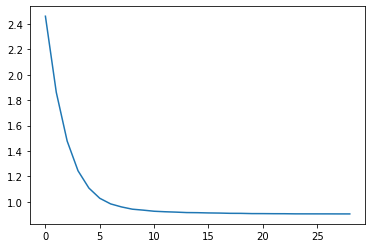

In [15]:
result=xgb.cv(
    dtrain=data_matrix,
    params=param_xgb,
    nfold=3,
    num_boost_round=100,
    early_stopping_rounds=10,
    metrics='rmse',
    as_pandas=True
)
result['train-rmse-mean'].plot()

In [16]:
grid_serach_param=[
    (max_depth,min_child_weight,learning_rates)
    for max_depth in range(5,25,5)
    for min_child_weight in range(1,12,3)
    for learning_rates in np.arange(.1,1,.05)
]

In [17]:
min_rmse=float('inf')
best_params=None
for max_depth, min_child_weight,lr in grid_serach_param:
    print(f'cv with max depth={max_depth}, min_child_weight={min_child_weight}')
    param_xgb['max_depth']=max_depth
    param_xgb['min_child_weight']=min_child_weight
    param_xgb['learning_rates']=lr
    result=xgb.cv(
        dtrain=data_matrix,
    params=param_xgb,
    nfold=3,
    num_boost_round=100,
    early_stopping_rounds=10,
    metrics='rmse',
    as_pandas=True
    )
    mean_rmse=result['test-rmse-mean'].min()
    boost_rounds=result['test-rmse-mean'].argmin()
    if mean_rmse<min_rmse:
        min_rmse=mean_rmse
        best_params=(max_depth,min_child_weight,lr)

cv with max depth=5, min_child_weight=1
[21:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rates, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rates, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rates, n_estimators } m

In [18]:
print(f"Best params: {best_params[0]}, {best_params[1]}, {best_params[2]} with minimum rmse: {min_rmse} ")

Best params: 15, 1, 0.1 with minimum rmse: 0.961217 


In [16]:
param_xgb['learning_rate'] = .1
param_xgb['max_depth'] = 10
param_xgb['alpha'] = 10
param_xgb['min_child_weight'] = 5
param_xgb

{'learning_rates': [0.1, 0.2, 0.3],
 'max_depth': 10,
 'alpha': 10,
 'n_estimators': 10,
 'learning_rate': 0.1,
 'min_child_weight': 5}

In [17]:
tx,testx,ty,testy=train_test_split(x,y,random_state=0)
dtrain=xgb.DMatrix(data=tx,label=ty)
dtest=xgb.DMatrix(data=testx,label=testy)

In [20]:
model=xgb.train(
    param_xgb,
    dtrain,
    num_boost_round=200,
    evals=[(dtest,"Test")],
    early_stopping_rounds=10
)

[21:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rates, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:3.01854
[1]	Test-rmse:2.75216
[2]	Test-rmse:2.51616
[3]	Test-rmse:2.30782
[4]	Test-rmse:2.12292
[5]	Test-rmse:1.96225
[6]	Test-rmse:1.82049
[7]	Test-rmse:1.69787
[8]	Test-rmse:1.59147
[9]	Test-rmse:1.49956
[10]	Test-rmse:1.41877
[11]	Test-rmse:1.35169
[12]	Test-rmse:1.29277
[13]	Test-rmse:1.24270
[14]	Test-rmse:1.20013
[15]	Test-rmse:1.16309
[16]	Test-rmse:1.13289
[17]	Test-rmse:1.10756
[18]	Test-rmse:1.08446
[19]	Test-rmse:1.06565
[20]	Test-rmse:1.05130
[21]	Test-rmse:1.03852
[22]	Test-rmse:1.02789
[23]	Test-rmse:1.01949
[24]	Test-rmse:1.01089
[25]	Test-rmse:1.00442
[26]	T

In [22]:
num_boost_round=model.best_iteration+1
best_model=xgb.train(
    param_xgb,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest,"Test")]
)

[21:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rates, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:3.01854
[1]	Test-rmse:2.75216
[2]	Test-rmse:2.51616
[3]	Test-rmse:2.30782
[4]	Test-rmse:2.12292
[5]	Test-rmse:1.96225
[6]	Test-rmse:1.82049
[7]	Test-rmse:1.69787
[8]	Test-rmse:1.59147
[9]	Test-rmse:1.49956
[10]	Test-rmse:1.41877
[11]	Test-rmse:1.35169
[12]	Test-rmse:1.29277
[13]	Test-rmse:1.24270
[14]	Test-rmse:1.20013
[15]	Test-rmse:1.16309
[16]	Test-rmse:1.13289
[17]	Test-rmse:1.10756
[18]	Test-rmse:1.08446
[19]	Test-rmse:1.06565
[20]	Test-rmse:1.05130
[21]	Test-rmse:1.03852
[22]	Test-rmse:1.02789
[23]	Test-rmse:1.01949
[24]	Test-rmse:1.01089
[25]	Test-rmse:1.00442
[26]	T

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
pred=best_model.predict(dtest)
np.sqrt(mean_squared_error(testy,pred))

0.9578010021920137

In [25]:
best_model.save_model("Ramen.model")

In [26]:
loaded_model=xgb.Booster()
loaded_model.load_model("Ramen.model")

In [28]:
stars_df.Stars

0       3.75
1       1.00
2       2.25
3       2.75
4       3.75
        ... 
2575    3.50
2576    1.00
2577    2.00
2578    2.00
2579    0.50
Name: Stars, Length: 2580, dtype: float64

In [27]:
loaded_model.predict(dtest)

array([3.6709228, 4.143993 , 3.4941156, 4.122208 , 4.1573133, 3.8106363,
       3.3459237, 2.8306248, 3.5430224, 3.7973921, 3.8888755, 3.5902772,
       2.7833748, 3.9684129, 2.8306248, 4.0146337, 3.8106363, 3.7973921,
       3.7973921, 3.3711212, 4.062827 , 3.2610822, 3.8436093, 3.8725753,
       3.7973921, 3.503247 , 3.4489226, 4.183008 , 3.3711212, 3.6157212,
       3.7973921, 3.4230144, 3.773131 , 3.3886294, 3.619323 , 3.5413823,
       3.9587631, 3.7973921, 3.229326 , 3.6709228, 3.4672053, 3.2920732,
       4.0210323, 3.773131 , 3.8888755, 3.381311 , 3.503247 , 4.2297983,
       3.7130342, 3.7227786, 3.6157212, 3.893765 , 3.6157212, 3.9413025,
       3.7273607, 3.9296038, 3.9750743, 3.2546268, 4.0559688, 3.3712401,
       4.0903683, 3.6104503, 3.944389 , 3.3662841, 3.9413025, 4.2297983,
       4.122208 , 3.3488834, 4.2955213, 4.0210323, 3.9587631, 3.0863461,
       3.6887486, 3.5738099, 3.3711212, 3.6718879, 3.9750743, 3.8798356,
       3.944389 , 3.3662841, 3.7973921, 3.3711212, 

C:\Users\hiten\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hiten\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


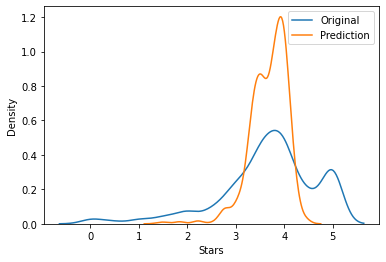

In [29]:
sns.distplot(y,hist=False,label='Original')
sns.distplot(pred,hist=False,label='Prediction')
plt.legend()
plt.show()